<a href="https://colab.research.google.com/github/kurosakiichig/glove_matrix-/blob/main/problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Window Size 1 동시출현 행렬:
 [[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Window Size 3 동시출현 행렬:
 [[0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0

<ipython-input-6-f13000cc8fcf>:63: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-f13000cc8fcf>:63: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-f13000cc8fcf>:63: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-f13000cc8fcf>:63: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-f13000cc8fcf>:63: UserWarning: Glyph 46373 (\N{HANGUL SYLLABLE DIB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-f13000cc8fcf>:63: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-f13000cc8fcf>:63: UserWarning: Glyph 45789 (\N{HANGUL SYLLABLE NING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-inp

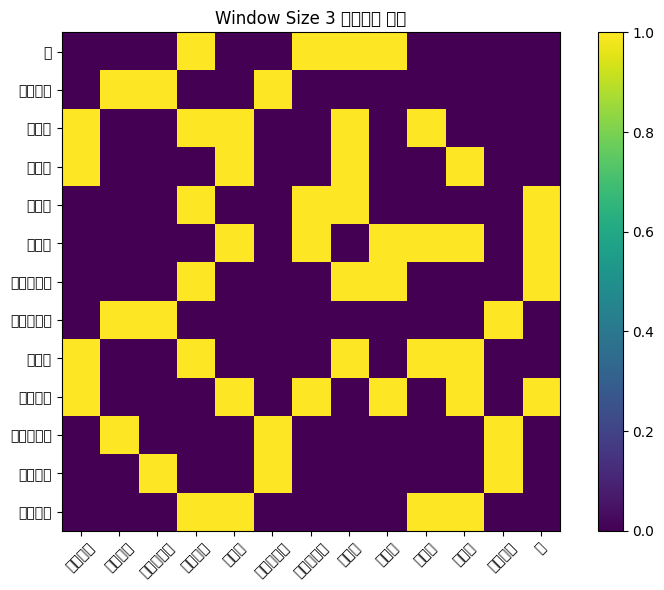

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import seaborn as sns


corpus = [
    "자연어 처리는 인공지능의 한 분야이다",
    "인공지능은 머신러닝과 딥러닝을 포함한다",
    "자연어 처리와 컴퓨터 비전은 대표적인 분야이다"
]


def tokenize(text):
    return text.split()


tokenized_corpus = [tokenize(sentence) for sentence in corpus]
vocab = sorted(set(word for sentence in tokenized_corpus for word in sentence))
word2idx = {word: idx for idx, word in enumerate(vocab)}


def build_cooccurrence_matrix(tokenized_corpus, word2idx, window_size=1):
    vocab_size = len(word2idx)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.float32)

    for sentence in tokenized_corpus:
        for i, word in enumerate(sentence):
            center_idx = word2idx[word]
            # 주변 단어를 탐색 (양쪽 모두)
            for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
                if i != j:
                    context_idx = word2idx[sentence[j]]
                    co_matrix[center_idx, context_idx] += 1
    return co_matrix


window_sizes = [1, 3, 5]
co_matrices = {}
for w in window_sizes:
    co_matrices[w] = build_cooccurrence_matrix(tokenized_corpus, word2idx, window_size=w)
    print(f"Window Size {w} 동시출현 행렬:\n", co_matrices[w])


def get_top_pairs(co_matrix, word2idx, top_n=5):
    pairs = []
    for i in range(co_matrix.shape[0]):
        for j in range(co_matrix.shape[1]):
            if co_matrix[i, j] > 0:
                pairs.append(((list(word2idx.keys())[i], list(word2idx.keys())[j]), co_matrix[i, j]))
    pairs = sorted(pairs, key=lambda x: x[1], reverse=True)
    return pairs[:top_n]

print("상위 5 단어 쌍 (윈도우=3):", get_top_pairs(co_matrices[3], word2idx))


plt.figure(figsize=(8, 6))
plt.imshow(co_matrices[3], interpolation='nearest', cmap='viridis', origin='lower')
plt.title("Window Size 3 동시출현 행렬")
plt.colorbar()
plt.xticks(ticks=np.arange(len(vocab)), labels=vocab, rotation=45)
plt.yticks(ticks=np.arange(len(vocab)), labels=vocab)
plt.tight_layout()
plt.show()

